In [1]:
import re

from wordcloud import WordCloud
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import (
    feature_extraction,
    linear_model,
    model_selection,
    preprocessing,
    cluster,
)
import nltk

tf idf

one vs rest ou
tester un 1er modéle multilabel 

non supervisé
allocation directive location lda
negativ matice

In [2]:
nltk.download("omw-1.4")

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

https://spacy.io/usage#quickstart
https://www.kaggle.com/code/rftexas/nlp-cheatsheet-master-nlp
https://www.kaggle.com/code/philculliton/nlp-getting-started-tutorial/notebook

In [3]:
pip install jupyter-black jupyter

Note: you may need to restart the kernel to use updated packages.


In [4]:
# for black formating
import jupyter_black  # pip install jupyter-black jupyter

jupyter_black.load()
# ??jupyter_black.load #show config

```sql
SELECT TOP 1000000 Title, Body, Tags, Id, Score, ViewCount, FavoriteCount, AnswerCount, CommentCount, ClosedDate, AcceptedAnswerId
FROM Posts
WHERE ViewCount>100 AND (LEN(TAGS)-LEN(REPLACE(Tags, '<','')))>=5
```
only get 500000

In [5]:
df = pd.read_csv("/kaggle/input/stackoverflowqueryres0/QueryResults.csv")

```sql
SELECT TOP 500000 Title, Body, Tags, Id, Score, ViewCount, FavoriteCount, AnswerCount, CommentCount, ClosedDate, AcceptedAnswerId
FROM Posts
WHERE ViewCount>1000 AND Score>10 AND (AnswerCount>5 OR CommentCount>5) AND (LEN(TAGS)-LEN(REPLACE(Tags, '<','')))>=4
```

In [6]:
df = pd.concat([pd.read_csv("/kaggle/input/stackoverflow/QueryResults1Score.csv"), df])

```sql
SELECT TOP 500000 Title, Body, Tags, Id, Score, ViewCount, FavoriteCount, AnswerCount, CommentCount, ClosedDate, AcceptedAnswerId
FROM Posts
WHERE ViewCount>1000 AND Score>10 AND (AnswerCount>5 OR CommentCount>5) AND (LEN(TAGS)-LEN(REPLACE(Tags, '<','')))>=4
ORDER BY Score Desc, ViewCount DESC
```

In [7]:
df = pd.concat(
    [pd.read_csv("/kaggle/input/stackoverflow/QueryResults2TopOrderByScore.csv"), df]
)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Title             150000 non-null  object 
 1   Body              150000 non-null  object 
 2   Tags              150000 non-null  object 
 3   Id                150000 non-null  int64  
 4   Score             150000 non-null  int64  
 5   ViewCount         150000 non-null  int64  
 6   FavoriteCount     116783 non-null  float64
 7   AnswerCount       150000 non-null  int64  
 8   CommentCount      150000 non-null  int64  
 9   ClosedDate        7619 non-null    object 
 10  AcceptedAnswerId  107891 non-null  float64
dtypes: float64(2), int64(5), object(4)
memory usage: 13.7+ MB


In [9]:
df = df[~df.duplicated(subset="Id")].reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118442 entries, 0 to 118441
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Title             118442 non-null  object 
 1   Body              118442 non-null  object 
 2   Tags              118442 non-null  object 
 3   Id                118442 non-null  int64  
 4   Score             118442 non-null  int64  
 5   ViewCount         118442 non-null  int64  
 6   FavoriteCount     85312 non-null   float64
 7   AnswerCount       118442 non-null  int64  
 8   CommentCount      118442 non-null  int64  
 9   ClosedDate        5445 non-null    object 
 10  AcceptedAnswerId  81953 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 9.9+ MB


In [10]:
df["Tags"].value_counts(normalize=True).head(
    20
)  # combinaison de tags les plus fréquent

<javascript><jquery><html><css>                             0.000912
<javascript><jquery><html><css><twitter-bootstrap>          0.000735
<javascript><php><jquery><html><ajax>                       0.000321
<sql><sql-server><sql-server-2005><tsql>                    0.000270
<html><css><twitter-bootstrap><twitter-bootstrap-3>         0.000220
<javascript><php><jquery><html><css>                        0.000203
<sql><sql-server><tsql><sql-server-2008>                    0.000194
<javascript><jquery><html><css><jquery-ui>                  0.000177
<javascript><php><jquery><mysql><ajax>                      0.000160
<c#><.net><winforms><datagridview>                          0.000144
<java><lambda><java-8><java-stream>                         0.000144
<javascript><jquery><html><forms>                           0.000135
<php><apache><.htaccess><redirect><mod-rewrite>             0.000127
<c#><.net><exception><exception-handling>                   0.000127
<android><android-studio><gradle><

In [11]:
tags = df["Tags"].str.extractall(r"\<([^>]*)\>")
tags

0
       match                    
0      0                    java
       1                     c++
       2             performance
       3        cpu-architecture
       4       branch-prediction
...                          ...
118441 0                      c#
       1                    .net
       2      garbage-collection
       3                 dispose
       4             idisposable

[550206 rows x 1 columns]

In [12]:
tags.value_counts(normalize=True).head(50) * 100 * (
    len(tags) / len(df)
)  # pour avoir prop

java              12.043025
c#                11.783827
javascript        11.657182
python             8.665845
android            6.974722
c++                6.633627
ios                6.242718
html               5.870384
php                5.540264
.net               5.331724
jquery             5.319059
css                3.783286
objective-c        3.059725
c                  3.055504
sql                2.984583
iphone             2.774354
asp.net            2.726229
mysql              2.357272
linux              2.331943
node.js            2.293105
arrays             2.093008
swift              2.049948
sql-server         1.968896
json               1.949477
string             1.882778
windows            1.827899
performance        1.827055
ruby-on-rails      1.714763
xcode              1.713919
spring             1.669171
ajax               1.523108
database           1.500312
asp.net-mvc        1.467385
algorithm          1.386333
ruby               1.354249
macos              1

In [13]:
print(
    f"les 50tags les plus fréquent représente {tags.value_counts(normalize=True).head(50).sum():.2%} des données"
)

les 50tags les plus fréquent représente 33.29% des données


## tags les plus fréquents:
### langage : 
- javascript(jquery, nodejs, angularjs,reactjs,angular)
- c# (.net, asp.net, asp.net-mvc, wpf) 
- java (spring, eclipse ou catégorie ide)
- python (django
- html css xml json ajax forms image (=front?)
- c (objective-c 
- database sql (mysql, sql-server ) (hybernate?)
- ? ruby ruby-on-rails,
- swift
### OS
- android
- ios iphone macos
- linux
- windows

### Notion divers (ni langage ni os)
- arrays string 
- performance multithreading
- unit-testing


In [14]:
tags

0
       match                    
0      0                    java
       1                     c++
       2             performance
       3        cpu-architecture
       4       branch-prediction
...                          ...
118441 0                      c#
       1                    .net
       2      garbage-collection
       3                 dispose
       4             idisposable

[550206 rows x 1 columns]

In [15]:
tags.unstack()[0]

match,0,1,2,3,4,5
0,java,c++,performance,cpu-architecture,branch-prediction,NaN
1,git,version-control,git-commit,undo,NaN,NaN
2,git,version-control,git-branch,git-push,git-remote,NaN
3,git,version-control,git-pull,git-fetch,NaN,NaN
4,c++,c,operators,code-formatting,standards-compliance,NaN
...,...,...,...,...,...,...
118437,iphone,ios,objective-c,nsstring,core-text,NaN
118438,google-maps,android-fragments,xamarin.android,google-maps-android-api-2,android-2.2-froyo,NaN
118439,javascript,google-maps,google-maps-api-3,internet-explorer-8,google-maps-markers,NaN
118440,java,email,exchange-server,jakarta-mail,ntlm,NaN


In [16]:
df = df.join(tags.unstack()[0])
df.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount,CommentCount,ClosedDate,AcceptedAnswerId,0,1,2,3,4,5
0,Why is processing a sorted array faster than p...,<p>Here is a piece of C++ code that shows some...,<java><c++><performance><cpu-architecture><bra...,11227809,26730,1769357,0.0,27,9,NaN,11227902.0,java,c++,performance,cpu-architecture,branch-prediction,NaN
1,How do I undo the most recent local commits in...,<p>I accidentally committed the wrong files to...,<git><version-control><git-commit><undo>,927358,25054,11955812,2.0,100,12,NaN,927386.0,git,version-control,git-commit,undo,NaN,NaN
2,How do I delete a Git branch locally and remot...,<h4>Failed Attempts to Delete a Remote Branch:...,<git><version-control><git-branch><git-push><g...,2003505,19720,10488243,0.0,41,10,NaN,2003515.0,git,version-control,git-branch,git-push,git-remote,NaN
3,What is the difference between 'git pull' and ...,"<p>What are the differences between <a href=""h...",<git><version-control><git-pull><git-fetch>,292357,13439,3286583,0.0,37,7,NaN,292359.0,git,version-control,git-pull,git-fetch,NaN,NaN
4,"What is the ""-->"" operator in C++?","<p>After reading <a href=""http://groups.google...",<c++><c><operators><code-formatting><standards...,1642028,9903,949071,0.0,28,0,NaN,1642035.0,c++,c,operators,code-formatting,standards-compliance,NaN


In [17]:
print(
    f"{sum(df[5].isna())} sans 6éme tag sur {df.shape[0]} ({sum(df[5].isna())/df.shape[0]:.2%})"
)
print(
    f"{sum(df[4].isna())} sans 6éme tag sur {df.shape[0]} ({sum(df[4].isna())/df.shape[0]:.2%})"
)

118438 sans 6éme tag sur 118442 (100.00%)
42008 sans 6éme tag sur 118442 (35.47%)


In [18]:
df[~df[5].isna()][["Title", "Body", 0, 1, 2, 3, 4, 5]]

,Title,Body,0,1,2,3,4,5
94452,Show the latest commit value within a web appl...,<p>I have a few Rails applications and I use G...,ruby-on-rails,git,version-control,github,amazon-elastic-beanstalk,beanstalk-svn
95832,Remove genres android-UniversalMusicPlayer-master,"<p>I am using ""android-UniversalMusicPlayer-ma...",android,android-studio,github,mobile-application,audio-player,android-music-player
104180,How To Add Media To MediaStore on Android 4.4 ...,"<p>Background: In Android 4.4, Google decided ...",android,android-sdcard,android-4.4-kitkat,audio-player,android-mediascanner,android-music-player
108913,When handling a form POST in a Django views.py...,<p>I have a Django application that generates ...,python,django,csv,httpresponse,forms,http-post


# Nettoyage du texte

In [19]:
# def remove_html(text):
#     return re.sub(r"<[^>]*>", "", text)

In [20]:
# remove_html(df["Body"][0])

In [21]:
# df["Body"].str.replace(r"<[^>]*>", "", regex=True)

In [22]:
def tokenizer_fct(sentence):
    # print(sentence)
    sentence_clean = (
        sentence.replace("-", " ").replace("+", " ").replace("/", " ").replace("#", " ")
    )
    word_tokens = nltk.tokenize.word_tokenize(sentence_clean)
    return word_tokens


# Stop words
stop_w = list(set(nltk.corpus.stopwords.words("english"))) + [
    "[",
    "]",
    ",",
    ".",
    ":",
    "?",
    "(",
    ")",
]


def stop_word_filter_fct(list_words):
    filtered_w = [w for w in list_words if not w in stop_w]
    filtered_w2 = [w for w in filtered_w if len(w) > 2]
    return filtered_w2


# lower case et alpha
def lower_start_fct(list_words):
    lw = [
        w.lower()
        for w in list_words
        if (not w.startswith("@"))
        #                                   and (not w.startswith("#"))
        and (not w.startswith("http"))
    ]
    return lw


# Lemmatizer (base d'un mot)
def lemma_fct(list_words):
    lemmatizer = nltk.stem.WordNetLemmatizer()
    lem_w = [lemmatizer.lemmatize(w) for w in list_words]
    return lem_w


# Fonction de préparation du texte pour le bag of words (Countvectorizer et Tf_idf, Word2Vec)
def transform_bow_fct(desc_text):
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    # lem_w = lemma_fct(lw)
    transf_desc_text = " ".join(lw)
    return transf_desc_text


# Fonction de préparation du texte pour le bag of words avec lemmatization
def transform_bow_lem_fct(desc_text):
    word_tokens = tokenizer_fct(desc_text)
    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(sw)
    lem_w = lemma_fct(lw)
    transf_desc_text = " ".join(lem_w)
    return transf_desc_text


# Fonction de préparation du texte pour le Deep learning (USE et BERT)
def transform_dl_fct(desc_text):
    word_tokens = tokenizer_fct(desc_text)
    #    sw = stop_word_filter_fct(word_tokens)
    lw = lower_start_fct(word_tokens)
    # lem_w = lemma_fct(lw)
    transf_desc_text = " ".join(lw)
    return transf_desc_text

In [23]:
# df["Title_bow"] = df["Title"].apply(lambda x: transform_bow_fct(x))
# df["Title_bow_lem"] = df["Title"].apply(lambda x: transform_bow_lem_fct(x))
# df["Title_dl"] = df["Title"].apply(lambda x: transform_dl_fct(x))
# df[["Title", "Title_bow", "Title_bow_lem", "Title_dl"]]

In [24]:
# df["Body_bow"] = df["Body"].apply(lambda x: transform_bow_fct(x))
# df["Body_bow_lem"] = df["Body"].apply(lambda x: transform_bow_lem_fct(x))
# df["Body_dl"] = df["Body"].apply(lambda x: transform_dl_fct(x))
# df[["Body", "Body_bow", "Body_bow_lem", "Body_dl"]].head()

In [25]:
# df["Code"] = df["Body"].str.replace(r".*<code[^>]*>(.*)</code>.*", "{$1}", regex=True)
# df["Code"][4]

In [26]:
# df["Body"][5].replace("\n", "")

In [27]:
# group = re.findall(
#     r"<code>(((?!</code).)*)</code>", df["Body"][5].replace("\n", ""), re.MULTILINE
# )
# group

In [28]:
# group[1]

In [29]:
# df["Body_nohtml"] = df["Body"].str.replace(
#     r"<[^>]*>", "", regex=True
# )  # df["Body"].apply(lambda x: remove_html(x))
# df["Body_nohtml_bow"] = df["Body_nohtml"].apply(lambda x: transform_bow_fct(x))

In [30]:
def words_cloud(data, stopwords=[]):
    plt.figure(figsize=(20, 15))
    wordcloud = WordCloud(
        background_color="white", stopwords=stopwords, max_words=50
    ).generate(data.to_string(header=False, index=False))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()


# words_cloud(df["Body_nohtml_bow"])

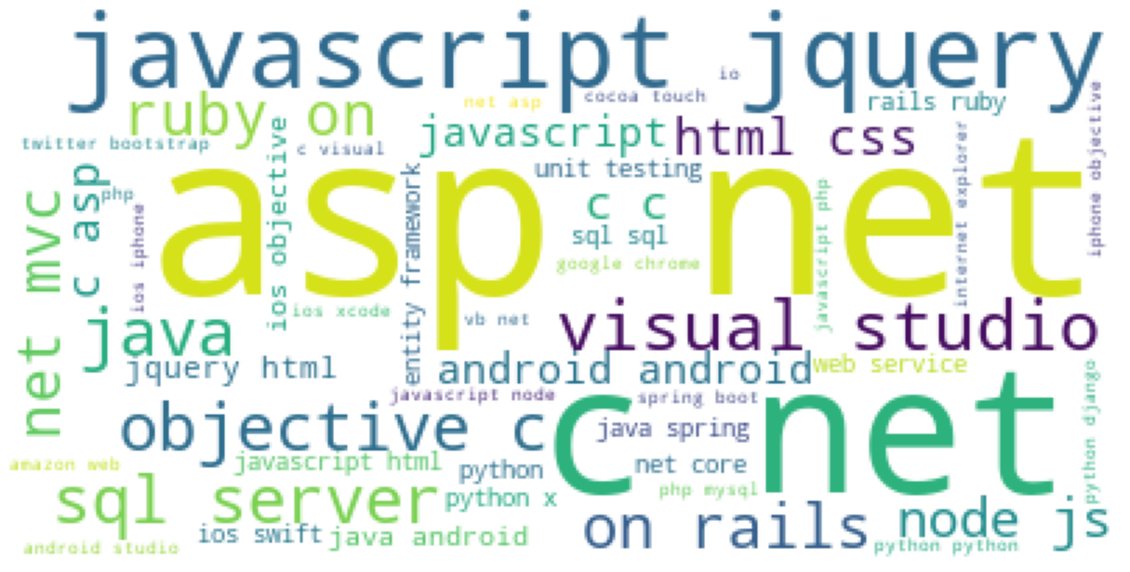

In [31]:
words_cloud(df[[0, 1, 2, 3, 4, 5]], stopwords=["Nan"])

In [32]:
# words_cloud(
#     df["Body_nohtml"],
#     stopwords=[
#         "I",
#         "i",
#         "and",
#         "am",
#         "have",
#         "I'm",
#         "i'm",
#         "in",
#         "for",
#         "a",
#         "we",
#         "to",
#         "is",
#         "of",
#         "the",
#         "but",
#     ],
# )

In [33]:
# # stopwords = [
#     "I",
#     "i",
#     "and",
#     "am",
#     "have",
#     "I'm",
#     "i'm",
#     "in",
#     "for",
#     "a",
#     "we",
#     "to",
#     "is",
#     "of",
#     "the",
#     "but",
#     "trying",
#     "want",
#     "need",
#     "with",
#     "use",
#     "using",
#     "on",
#     "an",
#     "thi",
#     "this",
#     "that",
#     "So",
#     "one",
#     "my",
#     "when",
#     "it",
#     "here",
#     "all",
#     "way",
#     "s",
#     "as",
#     "n",
#     "t",
#     "do",
#     "w",
#     "m",
#     "f",
#     "get",
#     "there",
# ]
# words_cloud(
#     df["Body_nohtml"],
#     stopwords=stopwords,
# )

In [34]:
def tag_is_in(df: pd.DataFrame(), tag: str, nb_cols: int = 6):
    return eval("|".join(f'(df[{i}] == "{tag}")' for i in range(0, nb_cols)))


tag_is_in(df, "javascript")

0         False
1         False
2         False
3         False
4         False
          ...  
118437    False
118438    False
118439     True
118440    False
118441    False
Length: 118442, dtype: bool

In [35]:
print(
    f'{sum(tag_is_in(df, "javascript"))} js ({(sum(tag_is_in(df, "javascript"))/ len(df)):.2%})'
)

13807 js (11.66%)


In [36]:
# words_cloud(
#     df.loc[tag_is_in(df, "javascript"), "Body_nohtml"],
#     stopwords=stopwords,
# )

In [37]:
# words_cloud(
#     df.loc[tag_is_in(df, "javascript"), "Body_nohtml_bow"],
#     stopwords=stopwords,
# )

In [38]:
# words_cloud(
#     df.loc[tag_is_in(df, "python"), "Body_nohtml"],
#     stopwords=stopwords,
# )

In [39]:
# words_cloud(
#     df.loc[tag_is_in(df, "java"), "Body_nohtml"],
#     stopwords=stopwords,
# )

In [40]:
# words_cloud(
#     df.loc[tag_is_in(df, "c#"), "Body_nohtml"],
#     stopwords=stopwords,
# )

In [41]:
# words_cloud(
#     df.loc[tag_is_in(df, "c#"), "Body_nohtml_bow"],
#     stopwords=stopwords,
# )

# Count vectorizer

In [42]:
# count_vectorizer = feature_extraction.text.CountVectorizer(min_df=0.01,max_df=0.9, max_features=None)
# train_vectors_test = count_vectorizer.fit_transform(df["Title_bow"][0:10])
# print(train_vectors_test[0].todense().shape)
# print(train_vectors_test[0].todense())

In [43]:
# train_vectors = count_vectorizer.fit_transform(df["Title_bow"])
# train_vectors.shape

In [44]:
# train_vectors[1].todense()

In [45]:
# clf = linear_model.RidgeClassifier()

In [46]:
# clustering = cluster.KMeans(n_clusters=5).fit(train_vectors)
# df["Kmeans5"] = clustering.labels_
# print(df["Kmeans5"].value_counts())
# df["Kmeans5"].value_counts(normalize=True).plot.pie(
#     figsize=(10, 10),
#     autopct="%.1f%%",
#     legend=False,
#     title=f"Répartition des clusters",
# )
# plt.show()
# df[df["Kmeans5"] == 3][["Title", "Title_bow", 0, 1, 2, 3, 4, "Body_nohtml_bow"]]

In [47]:
import spacy
from bs4 import BeautifulSoup

nlp = spacy.load("en_core_web_sm")

In [48]:
doc = nlp(df["Title"][5000])
# doc = nlp(df["Body_nohtml"][5])
def nlp_print(phrase: str):
    doc = nlp(phrase)
    print(
        f"Token \t\tLemma \t\tStopword\t\tPartOfSpeech".format(
            "Token", "Lemma", "Stopword", "PartOfSpeech"
        )
    )
    print("-" * 60)
    for token in doc:
        print(
            f"{token.text}\t\t{token.lemma_}\t\t{token.is_stop} \t\t {token.pos_,}"
        )  # token.shape_, token.is_alpha, token.tag_,
    return doc


doc = nlp_print(df["Title"][1])

Token 		Lemma 		Stopword		PartOfSpeech
------------------------------------------------------------
How		how		True 		 ('SCONJ',)
do		do		True 		 ('AUX',)
I		I		True 		 ('PRON',)
undo		undo		False 		 ('VERB',)
the		the		True 		 ('DET',)
most		most		True 		 ('ADV',)
recent		recent		False 		 ('ADJ',)
local		local		False 		 ('ADJ',)
commits		commit		False 		 ('NOUN',)
in		in		True 		 ('ADP',)
Git		Git		False 		 ('PROPN',)
?		?		False 		 ('PUNCT',)


In [49]:
nlp_print(df["Title"][11])

Token 		Lemma 		Stopword		PartOfSpeech
------------------------------------------------------------
How		how		True 		 ('SCONJ',)
do		do		True 		 ('AUX',)
JavaScript		JavaScript		False 		 ('PROPN',)
closures		closure		False 		 ('NOUN',)
work		work		False 		 ('VERB',)
?		?		False 		 ('PUNCT',)


How do JavaScript closures work?

In [50]:
nlp_print(df["Title"][9])

Token 		Lemma 		Stopword		PartOfSpeech
------------------------------------------------------------
What		what		True 		 ('PRON',)
does		do		True 		 ('AUX',)
if		if		True 		 ('SCONJ',)
_		_		False 		 ('PRON',)
_		_		False 		 ('NOUN',)
name		name		True 		 ('NOUN',)
_		_		False 		 ('NOUN',)
_		_		False 		 ('NOUN',)
=		=		False 		 ('NOUN',)
=		=		False 		 ('SYM',)
"		"		False 		 ('PUNCT',)
_		_		False 		 ('ADJ',)
_		_		False 		 ('ADJ',)
main		main		False 		 ('ADJ',)
_		_		False 		 ('NOUN',)
_		_		False 		 ('NOUN',)
"		"		False 		 ('PUNCT',)
:		:		False 		 ('PUNCT',)
do		do		True 		 ('VERB',)
?		?		False 		 ('PUNCT',)


What does if __name__ == "__main__": do?

In [51]:
# nlp_print(df["Body"][9])

In [52]:
df = df[["Id", "Title", "Body", 0, 1, 2, 3, 4, 5]].copy()
df

,Id,Title,Body,0,1,2,3,4,5
0,11227809,Why is processing a sorted array faster than p...,<p>Here is a piece of C++ code that shows some...,java,c++,performance,cpu-architecture,branch-prediction,NaN
1,927358,How do I undo the most recent local commits in...,<p>I accidentally committed the wrong files to...,git,version-control,git-commit,undo,NaN,NaN
2,2003505,How do I delete a Git branch locally and remot...,<h4>Failed Attempts to Delete a Remote Branch:...,git,version-control,git-branch,git-push,git-remote,NaN
3,292357,What is the difference between 'git pull' and ...,"<p>What are the differences between <a href=""h...",git,version-control,git-pull,git-fetch,NaN,NaN
4,1642028,"What is the ""-->"" operator in C++?","<p>After reading <a href=""http://groups.google...",c++,c,operators,code-formatting,standards-compliance,NaN
...,...,...,...,...,...,...,...,...,...
118437,19076229,NSString boundingRectWithSize cutting height s...,<p>I have a custom UIView which is drawing an ...,iphone,ios,objective-c,nsstring,core-text,NaN
118438,19076240,MvxBind:Error - View type not found - fragment,<p>I'm trying to add map as a part of my activ...,google-maps,android-fragments,xamarin.android,google-maps-android-api-2,android-2.2-froyo,NaN
118439,19076261,Markers not showing in ie 8,<p>I have created a Google Maps application wh...,javascript,google-maps,google-maps-api-3,internet-explorer-8,google-maps-markers,NaN
118440,19076270,JAVAMAIL : AUTH NTLM failed,<p>i try to send email with java in local netw...,java,email,exchange-server,jakarta-mail,ntlm,NaN


In [53]:
import progressbar
import time

In [54]:
%%time
df["Title_clean"] = ""
df["Code"] = ""
df["Body_clean"] = ""
start = time.time()


def time_e():
    return f"{time.time()-start:_.0f}s"


bar = progressbar.ProgressBar(
    maxval=len(df),
    widgets=[
        progressbar.Bar("=", "[", "]"),
        " ",
        progressbar.Percentage(),
        " ",
        time_e(),
    ],
)
bar.start()
for index, row in df.iterrows():
    bar.update(index)
    #     print(index, row["Title"])
    title = nlp(row["Title"])
    row["Title_clean"] = " ".join(
        [
            token.lemma_
            for token in title
            if token.pos_ in ["VERB", "NOUN", "PROPN", "ADP"] and not token.is_stop
        ]
    ).lower()
    # print(row["Title_clean"])
    soup = BeautifulSoup(row["Body"])
    row["Code"] = " ".join([code.get_text() for code in soup.find_all("code")])
    row["Body_clean"] = " ".join(
        [
            token.lemma_
            for token in nlp(" ".join([p.get_text() for p in soup.find_all("p")]))
            if token.pos_ in ["VERB", "NOUN", "PROPN", "ADP"] and not token.is_stop
        ]
    ).lower()
    df.iloc[index] = row
bar.finish()
df[0:5][["Title", "Title_clean", "Code", "Body_clean"]]

[=====================================================================] 100% 0s


CPU times: user 3h 26min 30s, sys: 4.26 s, total: 3h 26min 34s
Wall time: 3h 26min 49s


,Title,Title_clean,Code,Body_clean
0,Why is processing a sorted array faster than p...,process array process array,#include <algorithm>\n#include <ctime>\n#inclu...,piece c++ code show behavior reason sort datum...
1,How do I undo the most recent local commits in...,undo commit git,,commit file git push commit server undo commit...
2,How do I delete a Git branch locally and remot...,delete git branch,$ git branch -d remotes/origin/bugfix\nerror: ...,delete remote origin bugfix branch
3,What is the difference between 'git pull' and ...,difference git pull git fetch,git pull git fetch,difference git pull git fetch
4,"What is the ""-->"" operator in C++?",operator c++,comp.lang.c++.moderated #include <stdio.h>\nin...,read hidden features dark corners c++/stl comp...


In [55]:
df.to_csv("/kaggle/working/stackoverflowCleaned.csv")

In [56]:
count_vectorizer = feature_extraction.text.CountVectorizer(min_df=0.005,max_df=0.95, max_features=None)

In [57]:
title_vectors = count_vectorizer.fit_transform(df["Title_clean"])
body_vectors = count_vectorizer.fit_transform(df["Body_clean"])
print(
    f"tokens unique:\n{title_vectors.shape[1]} dans title\n{body_vectors.shape[1]} dans body"
)

tokens unique:
192 dans title
876 dans body


In [58]:
# %%time
# clustering = cluster.KMeans(n_clusters=5).fit(np.asarray(title_vectors.todense()))
# df["KMeans_title_5"] = clustering.labels_
# print(df["KMeans_title_5"].value_counts())
# df["KMeans_title_5"].value_counts(normalize=True).plot.pie(
#     figsize=(10, 10),
#     autopct="%.1f%%",
#     legend=False,
#     title=f"Répartition des clusters",
# )
# plt.show()

In [59]:
# df[df["KMeans_title_5"] == 2][["Title", "Title_clean", 0, 1, 2, 3, 4, "Body_clean"]]

In [60]:
# df[df["KMeans_title_5"] == 2][0].value_counts()

In [61]:
# %%time
# clustering = cluster.KMeans(n_clusters=5).fit(np.asarray(body_vectors.todense()))
# df["KMeans_body_5"] = clustering.labels_
# print(df["KMeans_body_5"].value_counts())
# df["KMeans_body_5"].value_counts(normalize=True).plot.pie(
#     figsize=(10, 10),
#     autopct="%.1f%%",
#     legend=False,
#     title=f"Répartition des clusters",
# )
# plt.show()

In [62]:
from ipywidgets import interact


@interact(i=(0, df.shape[0] - 1))
def test_tr_print(i):
    print(
        f'{df["Title"][i]}\n{"*"*30}\n{df["Title_clean"][i]}\n{"*"*30}\n{df["Body"][i]}\n{"*"*30}\n{df["Body_clean"][i]}\n{"*"*30}\n{df["Code"][i]}\n{"*"*30}\n{df.loc[i,0]} {df.loc[i,1]} {df.loc[i,2]} {df.loc[i,3]} {df.loc[i,4]}'
    )

interactive(children=(IntSlider(value=59220, description='i', max=118441), Output()), _dom_classes=('widget-in…

In [63]:
test_tr_print(2)

How do I delete a Git branch locally and remotely?
******************************
delete git branch
******************************
<h4>Failed Attempts to Delete a Remote Branch:</h4>
<pre class="lang-bash prettyprint-override"><code>$ git branch -d remotes/origin/bugfix
error: branch 'remotes/origin/bugfix' not found.

$ git branch -d origin/bugfix
error: branch 'origin/bugfix' not found.

$ git branch -rd origin/bugfix
Deleted remote branch origin/bugfix (was 2a14ef7).

$ git push
Everything up-to-date

$ git pull
From github.com:gituser/gitproject

* [new branch] bugfix -&gt; origin/bugfix
Already up-to-date.
</code></pre>
<p>How do I properly delete the <code>remotes/origin/bugfix</code> branch both locally and remotely?</p>

******************************
delete remote origin bugfix branch
******************************
$ git branch -d remotes/origin/bugfix
error: branch 'remotes/origin/bugfix' not found.

$ git branch -d origin/bugfix
error: branch 'origin/bugfix' not found.

$ gi